In [40]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import os

path = 'C:/Users/justi/Documents/Money/transaction_data/'

def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

def mmddyyyyToDate(mmddyyyy,sep='/'):
    i1=mmddyyyy.find(sep)
    i2=mmddyyyy.find(sep,i1+1)
    m=int(mmddyyyy[:i1])
    d=int(mmddyyyy[i1+1:i2])
    yyyy=int(mmddyyyy[i2+1:])
    
    date=datetime.date(yyyy,m,d)
    return date

def yyyymmddToDate(mmddyyyy,sep='-'):
    i1=mmddyyyy.find(sep)
    i2=mmddyyyy.find(sep,i1+1)
    yyyy=int(mmddyyyy[:i1])
    m=int(mmddyyyy[i1+1:i2])
    d=int(mmddyyyy[i2+1:])
    
    date=datetime.date(yyyy,m,d)
    return date

print('--setup and functions')

--setup and functions


In [64]:
dfchase=pd.DataFrame()
dftd=pd.DataFrame()
files=getListOfFiles(path)
for file in files:
    if "Chase" in file:
        tmp=pd.read_csv(file)
        dfchase=pd.concat([tmp,dfchase])
    else:
        tmp=pd.read_csv(file)
        dftd=pd.concat([tmp,dftd])

dftd=dftd.drop_duplicates()
dfchase=dfchase.drop_duplicates()
dftd['Bank']='TD'
dftd['Date']=dftd['Date'].apply(lambda d: yyyymmddToDate(d))

dfchase['Bank']='Chase'
dfchase['Amount']=-dfchase['Amount']
dfchase['Date']=dfchase['Transaction Date'].apply(lambda d: mmddyyyyToDate(d))

del dfchase['Transaction Date']

df=dftd[['Date','Merchant Name','Merchant Category Description','Amount','Bank']]
df.columns=['Date','Description','Category','Amount','Bank']
df=pd.concat([df,dfchase[['Date','Description','Category','Amount','Bank']]])
df=df.sort_values(by='Date').reset_index(drop=True)

df['MY']=df['Date'].apply(lambda d: datetime.date(d.year,d.month,1))

df['Category']=df['Category'].apply(lambda cat: str(cat)[:50])

In [65]:
df.head(1)

,Date,Description,Category,Amount,Bank,MY
0,2019-01-17,Hummus Place - Amsterdam,DINING,28.0,TD,2019-01-01


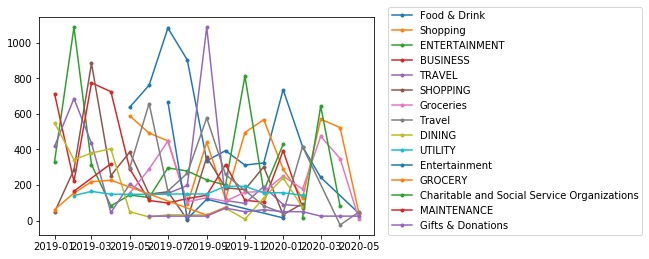

In [82]:
n=15

topcat=df.groupby('Category').sum().reset_index(drop=False)[['Category','Amount']].sort_values(by='Amount',ascending=False)
topcat=list(topcat.head(n)['Category'])

dfmy=df.groupby(['MY','Category']).sum().reset_index(drop=False)[['MY','Category','Amount']]

for cat in topcat:
    dftmp=dfmy[dfmy['Category']==cat]
    plt.plot(dftmp['MY'],dftmp['Amount'],'.-',label=cat)
    plt.legend(loc=(1.04,0))

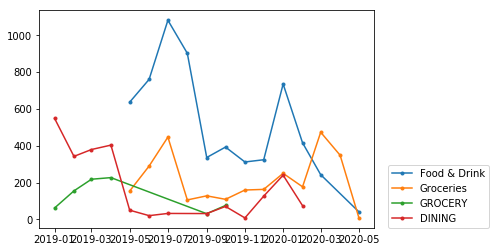

In [83]:
for cat in ['Food & Drink','Groceries','GROCERY','DINING']:
    dftmp=dfmy[dfmy['Category']==cat]
    plt.plot(dftmp['MY'],dftmp['Amount'],'.-',label=cat)
    plt.legend(loc=(1.04,0))

In [94]:
pd.crosstab(index=dfmy['MY'],columns=dfmy['Category'],values=dfmy['Amount'],aggfunc=sum())

TypeError: sum expected at least 1 arguments, got 0